# Time series forecasting fundamentals with TensorFlow + Milestone Project 3: BitPredict 💰

## Get data

We're going to be using the historical price of Bitcoin to try and predict the future price of Bitcoin

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-02-01 15:22:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: 'BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.2'

     0K .......... .......... .......... .......... .......... 28% 3.45M 0s
    50K .......... .......... .......... .......... .......... 57% 2.61M 0s
   100K .......... .......... .......... .......... .......... 86% 30.7M 0s
   150K .......... .......... ....                            100% 29.5M=0.04s

2023-02-01 15:22:05 (4.83 MB/s) - 'BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.2' saved [178509/178509]



## Import time series data with Pandas

In [2]:
# Import pandas
import pandas as pd

# Let's read in the data
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column and tell pandas column 1 is a date time

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
# Last samples from the data set
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [4]:
# Grab info from the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


We've collected the historical price of Bitcoin for the past ~8 years but there's 2787 samples. 

Typically, deep learning models like lots of samples. 1,000 - 10,000 - 1,000,000

A smaller number of samples is something you'll often run into with time series data problems

In [5]:
# How many samples
len(df) # 365 * 8

2787

In [6]:
# Only having the closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


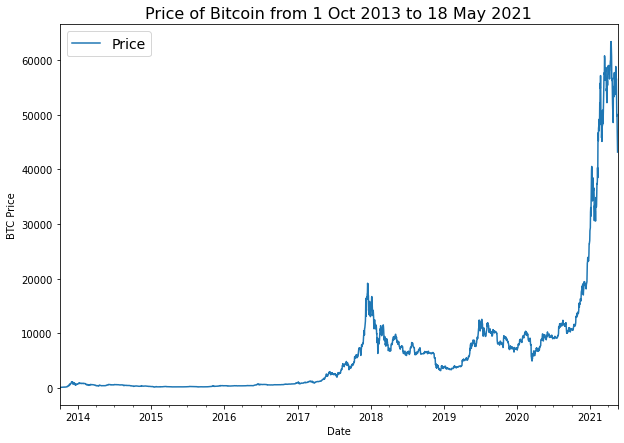

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021",fontsize=16);
plt.legend(fontsize=14);

## Importing time series data with Python's CSV module

In [8]:
# Importing and formatting 
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
    csv_reader = csv.reader(f,delimiter=",")
    next(csv_reader) # skip first line (gets ride of column titles)
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1],"%Y-%m-%d")) # Get the dates as dates (not strings)
        btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]        

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

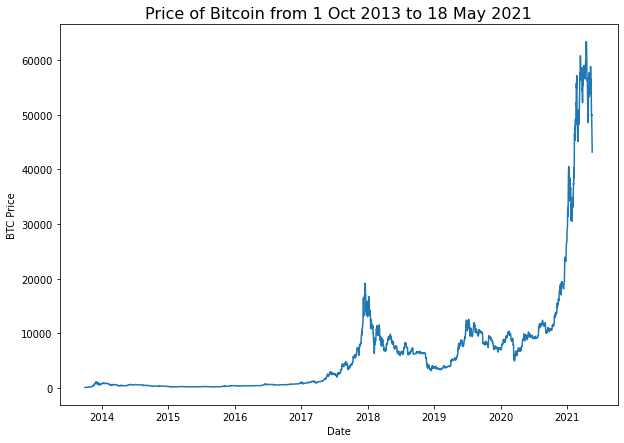

In [9]:
# Plot from csv
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_price)
plt.ylabel("BTC Price")
plt.xlabel("Date")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021",fontsize=16);

## Format data part 1: Create train and test sets of our time series data

### Creating train and test sets with time series data (the wrong way)

In [10]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
# Wrong way to make train/test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

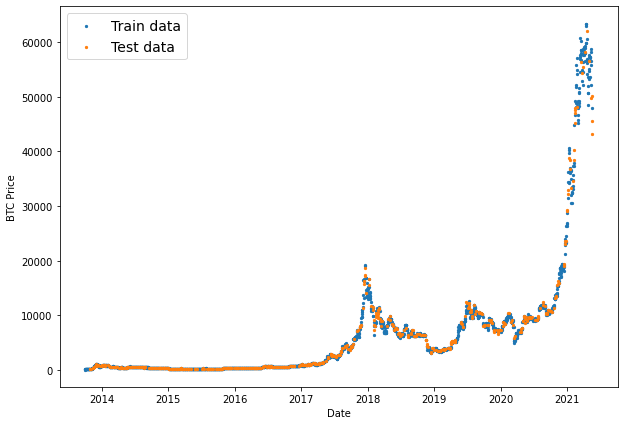

In [12]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train data")
plt.scatter(X_test,y_test,s=5,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14);
plt.show();

### Create train & test sets for time series (the right way)

In [13]:
# Create train and test splits the right way for time series data
split_size = int(0.8*len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

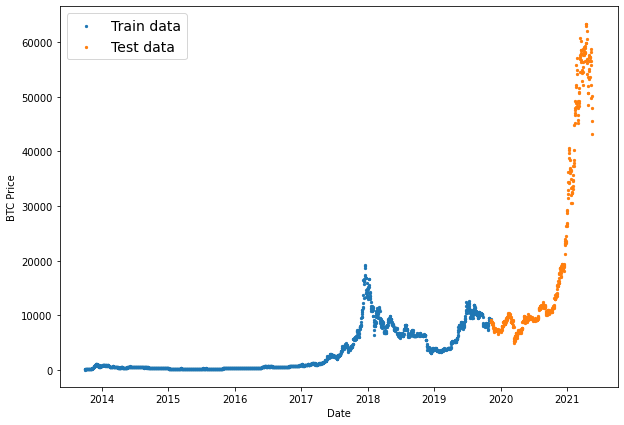

In [14]:
# Plot correctly made splits
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train data")
plt.scatter(X_test,y_test,s=5,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14);
plt.show();

## Create a plotting function

Typing plotting code is tedious, let's functionize it.

In [15]:
# Create a function to plot time series data
def plot_time_series(timesteps,values,format=".",start=0,end=None,label=None):
    """
    Plots timesteps against values.

    Parameters
    ----------
    timesteps: array of timestep values
    values: array of values
    format: style of plot, default "."
    start: where to start the plot (index)
    end: where to end the plot (index)
    label: label to show on plot

    """
    # Plot the series
    plt.plot(timesteps[start:end],values[start:end],format,label=label)
    plt.xlabel("Time (s)")
    plt.ylabel("BTC Price")

    if label:
        plt.legend(fontsize=14)
        
    plt.grid(True)

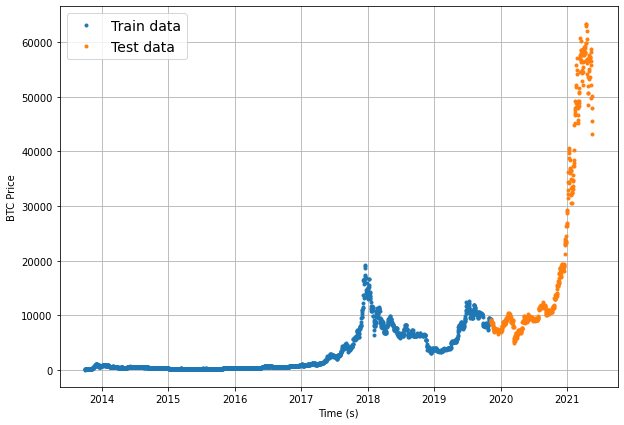

In [16]:
# Testing out plotting function
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label="Train data")
plot_time_series(timesteps=X_test,values=y_test,label="Test data")

## Modelling Experiements

We've got Bitcoin data, let's run a series of modelling experiments.

Terms to be familiar with:
* **Horizon** = number of timesteps into the future we're going to predict
* **Window size** = number of timesteps we're going to use to predict horizon

Modelling experiments --- (Horizon size, Window size, Extra data):
* 0. Naive model (baseline) --- **(NA, NA, NA)**
* 1. Dense model --- **(1, 7, NA)**
* 1. Same as 1 --- **(1, 30, NA)**
* 2. Same as 1 --- **(7, 30, NA)**
* 4. Conv 1D --- **(1, 7, NA)**
* 5. LSTM --- **(1, 7, NA)**
* 6. Same as 1 (but with multivariate data) --- **(1, 7, Block reward size)**
* 7. N-BEATs Algorithm --- **(1, 7, NA)**
* 8. Ensemble (multiple models optimized on different loss functions) --- **(1, 7, NA)**
* 9. Future prediction model (model to predict future values) --- **(1, 7, NA)**
* 10. Same as 1 (but with turkey data introduced) --- **(1, 7, NA)**

> 🔑📚 : [Reference for Time Series Forecasting](https://otexts.com/fpp3/)

## Model 0: Naive forecast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

> The prediction at timestep t (y_hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [17]:
# Create a naive forcecast
naive_forecast = y_test[:-1]
naive_forecast[:10],naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

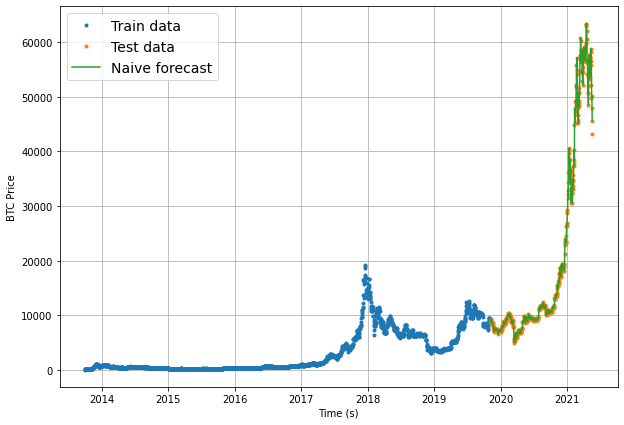

In [18]:
# Plot naive forecast
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format='-', label="Naive forecast") # everything after first index

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting ...

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics. 

A few common metrics (**the lower the better**):
* MAE - mean absolute error
* MSE - mean squared error

The main thing we are evaluating is: how do our model's forecasts (y_pred) compare against the actual values

In [19]:
import tensorflow as tf

In [20]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
    """
    Implement MASE (assuming no seasonality).
    """
    mae = tf.reduce_mean(tf.abs(y_true-y_pred))

    # Find MAE of naive forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)

    return mae / mae_naive_no_season

🔑 **Note**: For mean absolute scaled error (MASE), a scaled error is **> 1 if the forecast is worse than the naive** and **< 1 if the forecast is better than naive**.

In [21]:
# Test MASE (this vaue should = 1 or be very close to 1 with the naive forecast)
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [22]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return  {"mae": float(mae.numpy()),
          "mse": float(mse.numpy()),
          "rmse": float(rmse.numpy()),
          "mape": float(mape.numpy()),
          "mase": float(mase.numpy())}

In [23]:
# Let's compute the evaluation metrics using our function
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)

naive_results              

{'mae': 567.980224609375,
 'mse': 1147547.0,
 'rmse': 1071.2362060546875,
 'mape': 2.5165250301361084,
 'mase': 0.9995700120925903}

Save model results

In [259]:
# Saving model results
from Functions.helper_functions import save_model_results_json

des_path = r"Saved Results\10_time_series_forecasting_with_tensorflow"

save_model_results_json(filepath=des_path,
                        var_to_save=naive_results,
                        file_string="model_0_results")

Success! File written to destination.


In [24]:
# What does the dataset look like?
tf.reduce_mean(y_test), tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>,
 <tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

In [25]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


## Format Data Part 2: Windowing our dataset

Why do we window? 

We window our time series dataset to turn our data into a supervised learning problem.

In [26]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [27]:
# Let's setup global variables for window and horizon
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make prediction

In [28]:
# Create function to label window data
def get_labeled_windows(x, horizon=HORIZON):
    """
    Creates labels for windowed dataset.

    e.g. if horizon = 1
    Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])

    """
    return x[:,:-horizon], x[:,-horizon:]

In [29]:
# Test out the window labelling function
test_window, test_label = get_labeled_windows(tf.expand_dims(tf.range(8),axis = 0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We've got a way to label our windowed data. However, this only works on a small scale. We need a way to do the above across our entire time series.

Our function will:
1. Create a window step of specific window size
2. Use NumPy indexing to create a 2D array of multiple window steps
3. Uses the 2D array of multiple window steps (from 2.) to index on a target series (e.g. the historical price of Bitcoin)
4. Uses our `get_labeled_windows()` function we created above to turn the window steps into windows with a specified horizon

In [30]:
# Import numpy
import numpy as np

In [31]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labeled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [32]:
# Generate full windows and labels
full_windows, full_labels = make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [33]:
# View the first 3 windows/labels
for i in range(3):
    print(f"Window: {full_windows[i]}-> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ]-> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ]-> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ]-> Label: [125.96116]


In [34]:
# View the last 3 windows/labels
for i in range(3):
    print(f"Window: {full_windows[i-3]}-> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676]-> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472]-> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361]-> Label: [43144.47129086]


> 🔑 **Note**: There is a function that does similar to the one above [`tf.keras.utils.timeseries_dataset_from_array()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array)

## Turning windows into training and test sets

In [35]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [36]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [37]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

## Make a modelling checkpoint callback

Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performances against the other model's best performances. 

For example if our model performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

In [38]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path ="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                              monitor="val_loss",
                                              verbose=0,
                                              save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model: 
* A single dense layer with 128 hidden units and Relu activation
* An output layer with linear activation (no activation)
* Adam optimizer and MAE loss function
* Batch size of 128 (previously we've used 32)
* 100 epochs

In [39]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for reproducible results
tf.random.set_seed(42)

# 1. Build
model_1 = tf.keras.Sequential([
   layers.Dense(128, activation="relu"),
   layers.Dense(HORIZON, activation="linear") # linera activation -> ouput is the same as input
], name="model_1_dense") # name the model so we can save it

# 2. Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 2s 46ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6528 - val_mae: 2279.6528 - val_mse: 12772731.0000
Epoch 2/100
18/18 [==============================] - 0s 29ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9992 - val_mae: 1005.9992 - val_mse: 3441833.5000
Epoch 3/100
18/18 [==============================] - 1s 31ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.5938 - val_loss: 923.2863 - val_mae: 923.2863 - val_mse: 2868221.2500
Epoch 4/100
18/18 [==============================] - 0s 29ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5625 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.7500
Epoch 5/100
18/18 [==============================] - 1s 30ms/step - loss: 165.0895 - mae: 165.0895 - mse: 145490.8125 - val_loss: 895.2236 - val_mae: 895.2236 - val_mse: 2564574.5000
Epoch 6/100
18/18 [==============================] - 1s 35ms/step - loss: 158.5

In [41]:
# Evaluate model on test data
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 585.9753 - mae: 585.9753 - mse: 1197801.2500


[585.9752807617188, 585.9752807617188, 1197801.25]

In [42]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 568.9510 - mae: 568.9510 - mse: 1171744.0000


[568.9510498046875, 568.9510498046875, 1171744.0]

## Making forecasts with a model (on the test dataset)

To make "forecasts" on the test dataset (note: these won't be actual forecasts, they're only psuedo forecasts becasue actual forecasts are into the future), let's write a function to:

1. Take in a trained model
2. Takes in some input data (same kind of data the model was training on)
3. Passes the input data to the model's `predict()` method
4. Returns predictions

In [43]:
def make_preds(model, input_data):
    """
    Uses model to make predictions input_data
    """
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # return 1D array of predictions

In [44]:
# Make predictions of model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8861.713 , 8769.888 , 9015.712 , 8795.52  , 8723.8125, 8730.111 ,
        8691.953 , 8502.056 , 8460.962 , 8516.548 ], dtype=float32)>)

In [45]:
# Evalaute preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results                                 

{'mae': 568.9511108398438,
 'mse': 1171744.0,
 'rmse': 1082.47119140625,
 'mape': 2.544898271560669,
 'mase': 0.9994895458221436}

Save model results

In [ ]:
from Functions.helper_functions import save_model_results_json

des_path = r"Saved Results\10_time_series_forecasting_with_tensorflow"

save_model_results_json(filepath=des_path,
                        var_to_save=model_1_results,
                        file_string="model_1_results")

Success! File written to destination.


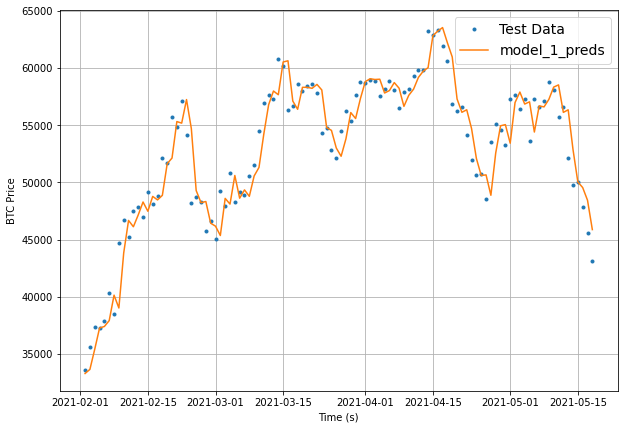

In [46]:
# Let's plot our model 1 predictions
offset = 450
plt.figure(figsize=(10,7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:,0],
                 start=offset,
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="model_1_preds")


## Model 2: Dense (window = 30, horizon = 1)

In [47]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in past

In [48]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [49]:
# Make train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)                                                                                

(2205, 552, 2205, 552)

In [50]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_2_dense")

# Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit 
model_2.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            batch_size=128,
            verbose=False,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: mod

In [51]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 608.9620


608.9619750976562

In [52]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 608.9620


608.9619750976562

In [53]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                          input_data=test_windows)
model_2_preds                         

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(552,), dtype=float32, numpy=
array([ 8946.984 ,  8967.847 ,  8820.252 ,  8615.827 ,  8485.794 ,
        8384.622 ,  8307.78  ,  8171.7856,  8217.463 ,  7839.15  ,
        7362.3716,  7241.631 ,  7111.7964,  7113.5   ,  7151.549 ,
        7358.374 ,  7538.334 ,  7628.2505,  7645.452 ,  7465.5327,
        7427.5684,  7281.351 ,  7320.043 ,  7380.991 ,  7541.0923,
        7543.998 ,  7559.2783,  7436.662 ,  7194.824 ,  7270.313 ,
        7158.483 ,  7335.815 ,  7157.436 ,  7235.8735,  6997.1646,
        6768.8154,  7112.8486,  7281.932 ,  7126.0703,  7329.2383,
        7272.7026,  7298.2256,  7298.365 ,  7241.6226,  7221.505 ,
        7269.7383,  7257.2437,  7432.154 ,  7370.5024,  7196.894 ,
        7278.009 ,  7004.2847,  7208.716 ,  7309.1733,  7451.58  ,
        7698.1133,  8025.408 ,  8096.4185,  8007.9087,  8011.6904,
        8135.065 ,  8216.162 ,  8226.958 ,  8601.827 ,  8900.414 ,
        8842.8545,  8964.693 ,  8932.719 ,  8815.342 ,  8676.931 ,
        8751.0

In [54]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results                     

{'mae': 608.9619750976562,
 'mse': 1281440.625,
 'rmse': 1132.00732421875,
 'mape': 2.769340991973877,
 'mase': 1.0644714832305908}

In [ ]:
from Functions.helper_functions import save_model_results_json

des_path = r"Saved Results\10_time_series_forecasting_with_tensorflow"

save_model_results_json(filepath=des_path,
                        var_to_save=model_2_results,
                        file_string="model_2_results")

Success! File written to destination.


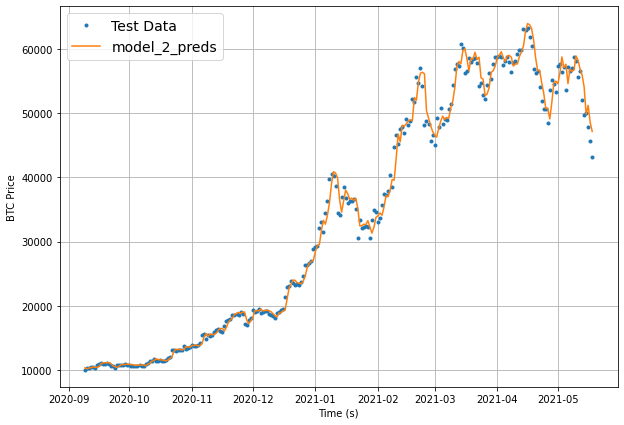

In [55]:
offset = 300
plt.figure(figsize=(10,7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_2_preds,start=offset,format="-",label="model_2_preds")

## Model 3: Dense (window = 30, horizon = 7)

In [56]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [57]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,labels=full_labels,test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [58]:
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_3_dense")

# Compile
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_3.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            batch_size=128,
            verbose=False,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])                

INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: mod

In [59]:
# Evaluate
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1340.4274


1340.4273681640625

In [60]:
# Load in model
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1234.8838


1234.8837890625

In [61]:
# Make predictions
model_3_preds = make_preds(model=model_3,
                           input_data=test_windows)
model_3_preds[:5]                       

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9250.798 , 9279.124 , 9394.038 , 9400.202 , 9479.183 , 9375.264 ,
        9302.472 ],
       [8945.557 , 9029.439 , 9164.761 , 8997.948 , 9077.654 , 8971.883 ,
        9081.854 ],
       [8883.711 , 8987.258 , 9057.07  , 8901.714 , 9001.872 , 8817.509 ,
        8971.558 ],
       [9090.947 , 9014.501 , 9010.567 , 9096.448 , 9052.973 , 9016.151 ,
        9001.476 ],
       [9002.045 , 8972.497 , 8869.7705, 8980.389 , 9212.569 , 9072.293 ,
        8887.335 ]], dtype=float32)>

In [62]:
tf.squeeze(test_labels).shape, model_3_preds.shape

(TensorShape([551, 7]), TensorShape([551, 7]))

In [ ]:
# Evaluate results
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([  561.2253  ,   301.9714  ,   297.9478  ,   413.84305 ,
          445.20926 ,   540.59717 ,   527.2284  ,   441.84564 ,
          498.7735  ,   639.1921  ,   803.132   ,   731.72614 ,
          678.61707 ,   797.1857  ,   575.334   ,   280.21143 ,
          239.92166 ,   246.152   ,   276.387   ,   285.75473 ,
          118.8042  ,   135.45557 ,   191.11852 ,   251.82582 ,
          170.28934 ,   154.20027 ,   107.244835,    97.662735,
          111.26402 ,   139.854   ,   269.1739  ,   369.81207 ,
          270.48102 ,   263.1211  ,   247.72252 ,   255.50502 ,
          298.48172 ,   245.26402 ,   243.13086 ,   255.7583  ,
          416.62576 ,   150.97021 ,    94.16588 ,   101.62012 ,
           93.76974 ,    86.75321 ,    73.27923 ,    79.045204,
           89.541084,    93.11977 ,   106.79862 ,   141.0957  ,
          178.73674 ,   145.46994 ,   256.4566  ,   392.8164  ,
          560.9116  ,   552.8188  ,   536.1548  ,   535.2687  ,
          448.70453 ,   267.23285

## Make our evaluation function work for larger horizons



In [63]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": float(mae.numpy()),
          "mse": float(mse.numpy()),
          "rmse": float(rmse.numpy()),
          "mape": float(mape.numpy()),
          "mase": float(mase.numpy())}

In [64]:
# Evaluate results
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1234.8836669921875,
 'mse': 5393734.0,
 'rmse': 1419.13623046875,
 'mape': 5.4874982833862305,
 'mase': 2.19740629196167}

Save model results

In [ ]:
from Functions.helper_functions import save_model_results_json

des_path = r"Saved Results\10_time_series_forecasting_with_tensorflow"

save_model_results_json(filepath=des_path,
                        var_to_save=model_3_results,
                        file_string="model_3_results")

Success! File written to destination.


We've  made and evaluated predictions with `model_3`, let's visualize the results

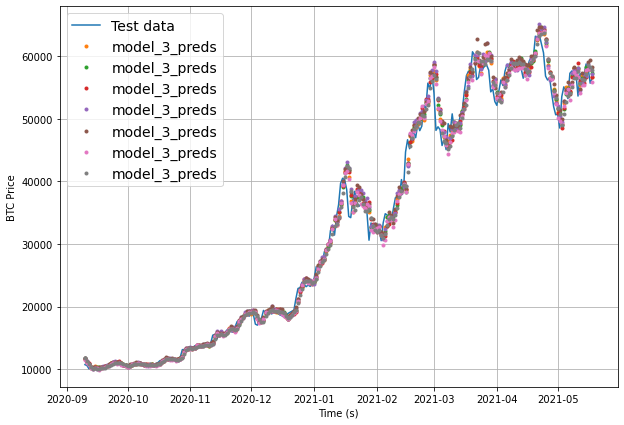

In [65]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,format="-",label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_3_preds,start=offset,format=".",label="model_3_preds")

In [66]:
# Let's see what our data looks like
model_3_preds[0]

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([9250.798, 9279.124, 9394.038, 9400.202, 9479.183, 9375.264,
       9302.472], dtype=float32)>

In [67]:
# Reduce mean because data is across 7 days
tf.reduce_mean(model_3_preds[0])

<tf.Tensor: shape=(), dtype=float32, numpy=9354.44>

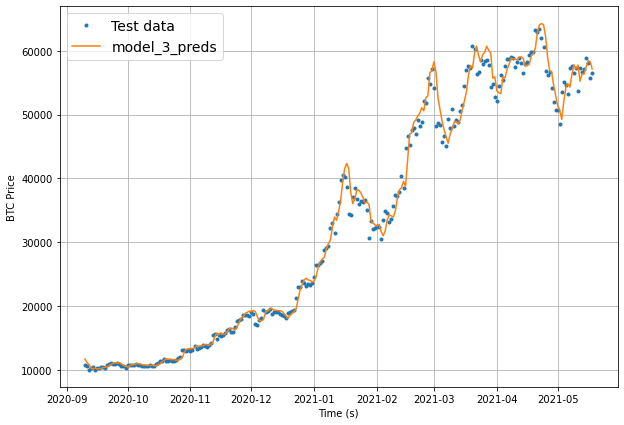

In [68]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,format=".",label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=tf.reduce_mean(model_3_preds,axis=1),start=offset,format="-",label="model_3_preds")

## Which of our models is performing the best so far? 

So we've trained a few models, now let's compare them and see how they've gone ...

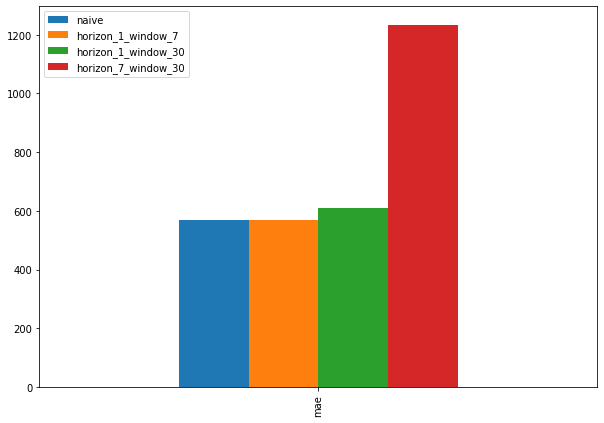

In [69]:
# Create data frame to compare results
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10,7), kind="bar");

## Model 4: Conv1D

In [70]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use a week of data

In [71]:
# Create windowed data
full_windows, full_labels = make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [72]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels) 

(2224, 2224, 556, 556)

To use the Conv1D layer, we need an input shape of: `(batch_size, timesteps, input_dim)`

In [73]:
# Check data input sjape
train_windows[0].shape # returns window size

(7,)

In [74]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [75]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)) # add extra dimension for `input_dim`

In [76]:
# Test out our lambda layer 
print(f"Original shape: {x.shape}") # Window size
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (window_size, horizon)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [77]:
# Create Conv1D model
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_4.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=False,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


In [78]:
# Get model summary
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Evlauate model
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 6ms/step - loss: 610.1541


610.154052734375

In [80]:
# Load in best epoch
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 570.8284


570.8284301757812

In [81]:
# Make predictions
model_4_preds = make_preds(model=model_4, input_data=test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8851.464, 8754.47 , 8983.927, 8759.671, 8703.627, 8708.294,
       8661.667, 8494.839, 8435.316, 8492.114], dtype=float32)>

In [82]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results                     

{'mae': 570.8284301757812,
 'mse': 1176671.375,
 'rmse': 1084.744873046875,
 'mape': 2.559335947036743,
 'mase': 1.002787470817566}

Save model results

In [ ]:
from Functions.helper_functions import save_model_results_json

des_path = r"Saved Results\10_time_series_forecasting_with_tensorflow"

save_model_results_json(filepath=des_path,
                        var_to_save=model_4_results,
                        file_string="model_4_results")

Success! File written to destination.


## Model 5: RNN (LSTM)

Let's build an RNN model for our time series data.

We'll use the same data we created previously.

In [83]:
tf.random.set_seed(42)

tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) 
x = layers.LSTM(128, activation="relu")(x) 
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=True,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])        

Epoch 1/100
15/18 [========================>.....] - ETA: 0s - loss: 2405.3928INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 90ms/step - loss: 2323.6077 - val_loss: 9222.6221
Epoch 2/100
16/18 [=========================>....] - ETA: 0s - loss: 741.1183 INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 87ms/step - loss: 695.4739 - val_loss: 1486.0378
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 239.4109INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 88ms/step - loss: 237.3842 - val_loss: 1298.9087
Epoch 4/100
15/18 [========================>.....] - ETA: 0s - loss: 182.5871INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 83ms/step - loss: 181.9185 - val_loss: 966.6432
Epoch 5/100
18/18 [==============================] - 0s 10ms/step - loss: 173.4023 - val_loss: 970.9296
Epoch 6/100
18/18 [==============================] - 0s 10ms/step - loss: 173.3822 - val_loss: 981.0975
Epoch 7/100
15/18 [========================>.....] - ETA: 0s - loss: 178.2909INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 84ms/step - loss: 171.9762 - val_loss: 921.8434
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 165.5515INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 83ms/step - loss: 165.5515 - val_loss: 900.0497
Epoch 9/100
13/18 [====================>.........] - ETA: 0s - loss: 159.1515INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 95ms/step - loss: 160.4305 - val_loss: 853.6299
Epoch 10/100
18/18 [==============================] - 0s 10ms/step - loss: 168.6475 - val_loss: 931.5431
Epoch 11/100
18/18 [==============================] - 0s 10ms/step - loss: 169.2183 - val_loss: 926.0713
Epoch 12/100
18/18 [==============================] - 0s 10ms/step - loss: 166.3748 - val_loss: 916.8346
Epoch 13/100
18/18 [==============================] - 0s 10ms/step - loss: 166.8522 - val_loss: 909.6310
Epoch 14/100
18/18 [==============================] - 0s 10ms/step - loss: 161.6482 - val_loss: 866.7496
Epoch 15/100
18/18 [==============================] - 0s 9ms/step - loss: 155.9960 - val_loss: 896.1780
Epoch 16/100
18/18 [==============================] - 0s 10ms/step - loss: 159.4309 - val_loss: 882.4391
Epoch 17/100
18/18 [==============================] - 0s 10ms/step - loss: 157.7812 - val_loss: 956.9371
Epoch 18/100
18/18 [==============================] - 0s 10ms/step - 

INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 84ms/step - loss: 150.1062 - val_loss: 844.7767
Epoch 23/100
18/18 [==============================] - 0s 10ms/step - loss: 149.1968 - val_loss: 861.0685
Epoch 24/100
18/18 [==============================] - 0s 9ms/step - loss: 147.1761 - val_loss: 848.1241
Epoch 25/100
15/18 [========================>.....] - ETA: 0s - loss: 150.9242INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 80ms/step - loss: 145.5848 - val_loss: 840.6231
Epoch 26/100
15/18 [========================>.....] - ETA: 0s - loss: 149.3639INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 84ms/step - loss: 145.0945 - val_loss: 813.1295
Epoch 27/100
13/18 [====================>.........] - ETA: 0s - loss: 147.1368INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 97ms/step - loss: 143.2227 - val_loss: 805.5842
Epoch 28/100
14/18 [======================>.......] - ETA: 0s - loss: 138.2989INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 82ms/step - loss: 141.6531 - val_loss: 785.5984
Epoch 29/100
18/18 [==============================] - 0s 10ms/step - loss: 140.8680 - val_loss: 801.3979
Epoch 30/100
18/18 [==============================] - 0s 10ms/step - loss: 141.3804 - val_loss: 791.8160
Epoch 31/100
14/18 [======================>.......] - ETA: 0s - loss: 138.1413INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 81ms/step - loss: 138.0144 - val_loss: 768.1625
Epoch 32/100
13/18 [====================>.........] - ETA: 0s - loss: 137.9087INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 87ms/step - loss: 135.9883 - val_loss: 764.0204
Epoch 33/100
18/18 [==============================] - 0s 12ms/step - loss: 136.6867 - val_loss: 791.4828
Epoch 34/100
15/18 [========================>.....] - ETA: 0s - loss: 135.5200INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 92ms/step - loss: 136.4118 - val_loss: 750.6531
Epoch 35/100
18/18 [==============================] - 0s 9ms/step - loss: 133.7257 - val_loss: 754.5988
Epoch 36/100
15/18 [========================>.....] - ETA: 0s - loss: 131.4828INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 80ms/step - loss: 133.4312 - val_loss: 734.5640
Epoch 37/100
18/18 [==============================] - 0s 9ms/step - loss: 131.2189 - val_loss: 747.5995
Epoch 38/100
16/18 [=========================>....] - ETA: 0s - loss: 130.3275INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 83ms/step - loss: 129.7771 - val_loss: 718.2686
Epoch 39/100
14/18 [======================>.......] - ETA: 0s - loss: 131.7524INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 80ms/step - loss: 129.4270 - val_loss: 716.9465
Epoch 40/100
18/18 [==============================] - 0s 9ms/step - loss: 130.6303 - val_loss: 728.0188
Epoch 41/100
16/18 [=========================>....] - ETA: 0s - loss: 129.6394INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 90ms/step - loss: 127.6953 - val_loss: 701.7618
Epoch 42/100
18/18 [==============================] - 0s 9ms/step - loss: 126.2242 - val_loss: 706.0325
Epoch 43/100
17/18 [===========================>..] - ETA: 0s - loss: 125.5050INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 78ms/step - loss: 125.7488 - val_loss: 693.8345
Epoch 44/100
16/18 [=========================>....] - ETA: 0s - loss: 126.2411INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 86ms/step - loss: 125.5652 - val_loss: 689.3698
Epoch 45/100
15/18 [========================>.....] - ETA: 0s - loss: 120.2784INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 80ms/step - loss: 123.4030 - val_loss: 682.0648
Epoch 46/100
15/18 [========================>.....] - ETA: 0s - loss: 127.7771INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 90ms/step - loss: 124.5756 - val_loss: 679.0645
Epoch 47/100
18/18 [==============================] - 0s 10ms/step - loss: 122.3864 - val_loss: 700.8399
Epoch 48/100
15/18 [========================>.....] - ETA: 0s - loss: 123.0828INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 82ms/step - loss: 122.4737 - val_loss: 676.0283
Epoch 49/100
18/18 [==============================] - 0s 9ms/step - loss: 122.0582 - val_loss: 690.3026
Epoch 50/100
18/18 [==============================] - 0s 9ms/step - loss: 124.1240 - val_loss: 714.4885
Epoch 51/100
18/18 [==============================] - 0s 9ms/step - loss: 125.1230 - val_loss: 778.5692
Epoch 52/100
15/18 [========================>.....] - ETA: 0s - loss: 128.3057INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 82ms/step - loss: 123.6763 - val_loss: 660.4346
Epoch 53/100
15/18 [========================>.....] - ETA: 0s - loss: 119.4300INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 81ms/step - loss: 119.8259 - val_loss: 659.2103
Epoch 54/100
14/18 [======================>.......] - ETA: 0s - loss: 123.1602INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 91ms/step - loss: 120.3732 - val_loss: 654.3164
Epoch 55/100
13/18 [====================>.........] - ETA: 0s - loss: 125.6378INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 83ms/step - loss: 118.6429 - val_loss: 648.6450
Epoch 56/100
15/18 [========================>.....] - ETA: 0s - loss: 119.3387INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 80ms/step - loss: 120.1063 - val_loss: 645.4896
Epoch 57/100
18/18 [==============================] - 0s 9ms/step - loss: 123.7777 - val_loss: 680.8215
Epoch 58/100
17/18 [===========================>..] - ETA: 0s - loss: 118.4386INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 87ms/step - loss: 118.7787 - val_loss: 641.7518
Epoch 59/100
14/18 [======================>.......] - ETA: 0s - loss: 117.6059INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 83ms/step - loss: 117.9966 - val_loss: 641.0961
Epoch 60/100
18/18 [==============================] - 0s 9ms/step - loss: 118.3239 - val_loss: 643.4174
Epoch 61/100
18/18 [==============================] - 0s 9ms/step - loss: 118.6151 - val_loss: 696.0721
Epoch 62/100
18/18 [==============================] - 0s 9ms/step - loss: 122.4420 - val_loss: 749.9855
Epoch 63/100
18/18 [==============================] - 0s 9ms/step - loss: 123.8672 - val_loss: 660.2910
Epoch 64/100
18/18 [==============================] - 0s 9ms/step - loss: 117.0016 - val_loss: 687.4307
Epoch 65/100
16/18 [=========================>....] - ETA: 0s - loss: 119.6771INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 79ms/step - loss: 119.8755 - val_loss: 632.8752
Epoch 66/100
18/18 [==============================] - 0s 9ms/step - loss: 117.1110 - val_loss: 640.7438
Epoch 67/100
16/18 [=========================>....] - ETA: 0s - loss: 115.1208INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 81ms/step - loss: 117.9292 - val_loss: 626.2725
Epoch 68/100
15/18 [========================>.....] - ETA: 0s - loss: 118.8637INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 96ms/step - loss: 117.1456 - val_loss: 625.1245
Epoch 69/100
18/18 [==============================] - 0s 10ms/step - loss: 119.3027 - val_loss: 625.7104
Epoch 70/100
15/18 [========================>.....] - ETA: 0s - loss: 113.1244INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 78ms/step - loss: 114.9086 - val_loss: 621.8661
Epoch 71/100
18/18 [==============================] - 0s 9ms/step - loss: 115.1822 - val_loss: 654.4707
Epoch 72/100
18/18 [==============================] - 0s 9ms/step - loss: 119.3393 - val_loss: 632.7345
Epoch 73/100
18/18 [==============================] - 0s 9ms/step - loss: 115.7310 - val_loss: 627.1373
Epoch 74/100
18/18 [==============================] - 0s 9ms/step - loss: 115.2199 - val_loss: 625.5247
Epoch 75/100
18/18 [==============================] - 0s 9ms/step - loss: 115.5961 - val_loss: 647.6739
Epoch 76/100
15/18 [========================>.....] - ETA: 0s - loss: 114.8522INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 79ms/step - loss: 114.7675 - val_loss: 617.0222
Epoch 77/100
18/18 [==============================] - 0s 9ms/step - loss: 116.8673 - val_loss: 666.9280
Epoch 78/100
18/18 [==============================] - 0s 9ms/step - loss: 117.1996 - val_loss: 627.6133
Epoch 79/100
15/18 [========================>.....] - ETA: 0s - loss: 113.0194INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 82ms/step - loss: 113.5704 - val_loss: 611.2637
Epoch 80/100
18/18 [==============================] - 0s 9ms/step - loss: 113.2127 - val_loss: 621.4436
Epoch 81/100
18/18 [==============================] - 0s 9ms/step - loss: 113.3850 - val_loss: 631.9078
Epoch 82/100
15/18 [========================>.....] - ETA: 0s - loss: 116.7464INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 90ms/step - loss: 116.0263 - val_loss: 610.8793
Epoch 83/100
18/18 [==============================] - 0s 9ms/step - loss: 113.4978 - val_loss: 631.0351
Epoch 84/100
18/18 [==============================] - 0s 9ms/step - loss: 114.4766 - val_loss: 620.5226
Epoch 85/100
18/18 [==============================] - 0s 9ms/step - loss: 114.3218 - val_loss: 640.3288
Epoch 86/100
18/18 [==============================] - 0s 9ms/step - loss: 115.0620 - val_loss: 614.5500
Epoch 87/100
16/18 [=========================>....] - ETA: 0s - loss: 112.6520INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 78ms/step - loss: 112.4946 - val_loss: 609.2250
Epoch 88/100
17/18 [===========================>..] - ETA: 0s - loss: 112.2514INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 82ms/step - loss: 112.1963 - val_loss: 603.8983
Epoch 89/100
18/18 [==============================] - 0s 10ms/step - loss: 112.1124 - val_loss: 629.1746
Epoch 90/100
18/18 [==============================] - 0s 9ms/step - loss: 116.6988 - val_loss: 645.2277
Epoch 91/100
18/18 [==============================] - 0s 9ms/step - loss: 115.3321 - val_loss: 626.2292
Epoch 92/100
18/18 [==============================] - 0s 9ms/step - loss: 113.3265 - val_loss: 612.6552
Epoch 93/100
16/18 [=========================>....] - ETA: 0s - loss: 113.7942INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 89ms/step - loss: 113.0708 - val_loss: 599.9893
Epoch 94/100
18/18 [==============================] - 0s 9ms/step - loss: 111.2166 - val_loss: 600.3155
Epoch 95/100
16/18 [=========================>....] - ETA: 0s - loss: 109.4773INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 79ms/step - loss: 111.1020 - val_loss: 598.2369
Epoch 96/100
18/18 [==============================] - 0s 10ms/step - loss: 112.3853 - val_loss: 605.4749
Epoch 97/100
18/18 [==============================] - 0s 11ms/step - loss: 111.6455 - val_loss: 625.0032
Epoch 98/100
18/18 [==============================] - 0s 9ms/step - loss: 112.1201 - val_loss: 600.1553
Epoch 99/100
18/18 [==============================] - 0s 8ms/step - loss: 110.9818 - val_loss: 598.9257
Epoch 100/100
17/18 [===========================>..] - ETA: 0s - loss: 112.8565INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 78ms/step - loss: 112.5498 - val_loss: 597.4623


In [84]:
# Load in the best version of model_5
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 597.4624


597.46240234375

In [85]:
# Make predictions
model_5_preds = make_preds(model=model_5, input_data=test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8992.637, 8824.648, 9010.125, 8848.681, 8743.077], dtype=float32)>

In [86]:
# Evaluate model_5 predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results                              

{'mae': 597.4623413085938,
 'mse': 1275416.0,
 'rmse': 1129.3431396484375,
 'mape': 2.6910972595214844,
 'mase': 1.0495758056640625}

Save model results

In [ ]:
from Functions.helper_functions import save_model_results_json

des_path = r"Saved Results\10_time_series_forecasting_with_tensorflow"

save_model_results_json(filepath=des_path,
                        var_to_save=model_5_results,
                        file_string="model_5_results")

Success! File written to destination.


## Make a multivariate time series dataset

Before we add a feature to our time series, what is a feature we can use? 

One feature we could add is whether or not Dan tweeted on that day ...

* day 1 - 0
* day 2 - 1
* day 3 - 0

What's a better feature to use?

How about the bitcoin halving events?


In [87]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [88]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [89]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

block_reward_2_days, block_reward_3_days

(1012, 2421)

In [90]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [91]:
# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days,-1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:,-1] = block_reward_4

In [92]:
# Visualize
bitcoin_prices_block.head(), bitcoin_prices_block.tail()

(                Price block_reward
 Date                              
 2013-10-01  123.65499           25
 2013-10-02  125.45500           25
 2013-10-03  108.58483           25
 2013-10-04  118.67466           25
 2013-10-05  121.33866           25,
                    Price block_reward
 Date                                 
 2021-05-14  49764.132082         6.25
 2021-05-15  50032.693137         6.25
 2021-05-16  47885.625255         6.25
 2021-05-17  45604.615754         6.25
 2021-05-18  43144.471291         6.25)

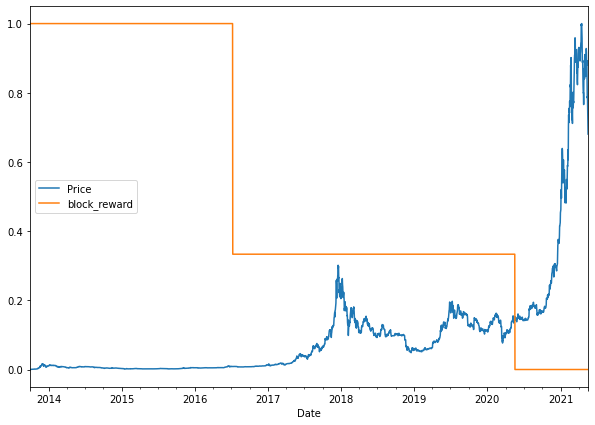

In [93]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price","block_reward"]]),
                                                                       columns=bitcoin_prices_block.columns,
                                                                       index=bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10,7));

## Making a windowed dataset with pandas

Previously, we've turned our univariate time series into windowed dataset using the helper functions.

However, since we've got multivariate data, these functions won't work.

We can use the `pandas.DataFrame.shift()` method to window our multivariate data

In [94]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [95]:
# Make a copy of the bitcoin historical data
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


We've created a way to window our data directly from a pandas dataframe

In [96]:
# Create X (windows) and y (horizon) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

X.head(), y.head()

(            block_reward     Price+1     Price+2     Price+3     Price+4  \
 Date                                                                       
 2013-10-08          25.0  121.794998  120.655327  121.338661  118.674660   
 2013-10-09          25.0  123.032997  121.794998  120.655327  121.338661   
 2013-10-10          25.0  124.049004  123.032997  121.794998  120.655327   
 2013-10-11          25.0  125.961159  124.049004  123.032997  121.794998   
 2013-10-12          25.0  125.279663  125.961159  124.049004  123.032997   
 
                Price+5     Price+6     Price+7  
 Date                                            
 2013-10-08  108.584831  125.455002  123.654991  
 2013-10-09  118.674660  108.584831  125.455002  
 2013-10-10  121.338661  118.674660  108.584831  
 2013-10-11  120.655327  121.338661  118.674660  
 2013-10-12  121.794998  120.655327  121.338661  ,
 Date
 2013-10-08    123.032997
 2013-10-09    124.049004
 2013-10-10    125.961159
 2013-10-11    125.27966

In [97]:
# Make train and test sets using indexing
split_size = int(len(X)*0.8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense (multivariate time series)

In [98]:
tf.random.set_seed(42)

# Make multivariate time seires model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(x=X_train,
            y=y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test,y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
14/18 [======================>.......] - ETA: 0s - loss: 1470.3951INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 31ms/step - loss: 1234.6805 - val_loss: 2061.9075
Epoch 2/100
13/18 [====================>.........] - ETA: 0s - loss: 385.2514INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 37ms/step - loss: 351.5054 - val_loss: 1908.6731
Epoch 3/100
12/18 [===================>..........] - ETA: 0s - loss: 244.0423INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 235.4153 - val_loss: 1329.0583
Epoch 4/100
13/18 [====================>.........] - ETA: 0s - loss: 217.3728INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 208.6112 - val_loss: 1102.1342
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 196.5770 - val_loss: 1107.8473
Epoch 6/100
14/18 [======================>.......] - ETA: 0s - loss: 184.8509INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 187.2244 - val_loss: 1036.1720
Epoch 7/100
15/18 [========================>.....] - ETA: 0s - loss: 187.1519INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 182.0246 - val_loss: 1019.2927
Epoch 8/100
16/18 [=========================>....] - ETA: 0s - loss: 174.2125INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 175.7059 - val_loss: 977.8487
Epoch 9/100
16/18 [=========================>....] - ETA: 0s - loss: 173.7910INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 170.1784 - val_loss: 954.4036
Epoch 10/100
13/18 [====================>.........] - ETA: 0s - loss: 159.3377INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 26ms/step - loss: 164.4430 - val_loss: 913.5146
Epoch 11/100
13/18 [====================>.........] - ETA: 0s - loss: 164.3883INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 158.6892 - val_loss: 874.2505
Epoch 12/100
14/18 [======================>.......] - ETA: 0s - loss: 152.0518INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 27ms/step - loss: 152.0732 - val_loss: 861.0416
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 151.1057 - val_loss: 886.1204
Epoch 14/100
13/18 [====================>.........] - ETA: 0s - loss: 144.2379INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 147.5482 - val_loss: 837.8613
Epoch 15/100
15/18 [========================>.....] - ETA: 0s - loss: 145.3921INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 142.3497 - val_loss: 794.4786
Epoch 16/100
15/18 [========================>.....] - ETA: 0s - loss: 137.0818INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 137.5206 - val_loss: 778.4050
Epoch 17/100
15/18 [========================>.....] - ETA: 0s - loss: 132.5314INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 135.8190 - val_loss: 772.4529
Epoch 18/100
15/18 [========================>.....] - ETA: 0s - loss: 140.1422INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 134.8562 - val_loss: 747.4801
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 130.3347 - val_loss: 761.0552
Epoch 20/100
14/18 [======================>.......] - ETA: 0s - loss: 131.2023INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 128.6775 - val_loss: 701.8977
Epoch 21/100
15/18 [========================>.....] - ETA: 0s - loss: 128.8097INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 24ms/step - loss: 129.5576 - val_loss: 691.0127
Epoch 22/100
13/18 [====================>.........] - ETA: 0s - loss: 133.5832INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 125.8060 - val_loss: 684.4120
Epoch 23/100
18/18 [==============================] - 0s 6ms/step - loss: 125.5263 - val_loss: 692.1295
Epoch 24/100
15/18 [========================>.....] - ETA: 0s - loss: 123.9486INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 122.4765 - val_loss: 674.2214
Epoch 25/100
15/18 [========================>.....] - ETA: 0s - loss: 125.8067INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 35ms/step - loss: 121.1171 - val_loss: 669.6443
Epoch 26/100
18/18 [==============================] - 0s 6ms/step - loss: 127.2623 - val_loss: 690.0407
Epoch 27/100
15/18 [========================>.....] - ETA: 0s - loss: 125.5024INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 124.6204 - val_loss: 643.9725
Epoch 28/100
18/18 [==============================] - 0s 6ms/step - loss: 118.2544 - val_loss: 656.2766
Epoch 29/100
13/18 [====================>.........] - ETA: 0s - loss: 122.5717INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 119.6374 - val_loss: 633.4545
Epoch 30/100
15/18 [========================>.....] - ETA: 0s - loss: 120.3370INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 119.5001 - val_loss: 625.3953
Epoch 31/100
18/18 [==============================] - 0s 6ms/step - loss: 114.5633 - val_loss: 668.5062
Epoch 32/100
15/18 [========================>.....] - ETA: 0s - loss: 117.7110INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 116.9750 - val_loss: 617.1060
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 115.2439 - val_loss: 649.0987
Epoch 34/100
18/18 [==============================] - 0s 6ms/step - loss: 114.5187 - val_loss: 632.1377
Epoch 35/100
12/18 [===================>..........] - ETA: 0s - loss: 115.9717INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 26ms/step - loss: 113.6357 - val_loss: 607.4173
Epoch 36/100
18/18 [==============================] - 0s 6ms/step - loss: 115.2605 - val_loss: 626.4316
Epoch 37/100
15/18 [========================>.....] - ETA: 0s - loss: 116.2274INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 113.7021 - val_loss: 606.2318
Epoch 38/100
15/18 [========================>.....] - ETA: 0s - loss: 112.6514INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 111.4061 - val_loss: 603.2921
Epoch 39/100
15/18 [========================>.....] - ETA: 0s - loss: 115.8052INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 112.7722 - val_loss: 596.0060
Epoch 40/100
15/18 [========================>.....] - ETA: 0s - loss: 111.1719INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 110.5418 - val_loss: 593.2171
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 110.8671 - val_loss: 609.1066
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 115.7249 - val_loss: 607.4874
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 111.3313 - val_loss: 606.2032
Epoch 44/100
13/18 [====================>.........] - ETA: 0s - loss: 106.6318INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 27ms/step - loss: 109.7027 - val_loss: 586.1216
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 107.8748 - val_loss: 593.8448
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8641 - val_loss: 586.4579
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 112.3586 - val_loss: 655.4484
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 109.1614 - val_loss: 598.7231
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3029 - val_loss: 589.2485
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1971 - val_loss: 649.3793
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 110.8514 - val_loss: 602.7662
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 111.8331 - val_loss: 599.2961
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 11

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 27ms/step - loss: 110.4068 - val_loss: 575.7750
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6609 - val_loss: 785.9762
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 124.9823 - val_loss: 670.3788
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 112.8591 - val_loss: 580.2877
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 107.2513 - val_loss: 597.5089
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 109.2322 - val_loss: 632.2950
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3518 - val_loss: 591.5407
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 108.4084 - val_loss: 617.5809
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 113.5326 - val_loss: 613.1470
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 11

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 112.0475 - val_loss: 575.5544
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 111.2831 - val_loss: 590.7808
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 106.7917 - val_loss: 586.8846
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 112.2987 - val_loss: 696.5298
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 124.7808 - val_loss: 698.5273
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 119.3443 - val_loss: 581.2106
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9960 - val_loss: 607.6736
Epoch 72/100
18/18 [==============================] - ETA: 0s - loss: 106.7710INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 24ms/step - loss: 106.7710 - val_loss: 573.6143
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 110.2485 - val_loss: 618.8953
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 105.5330 - val_loss: 574.9454
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3177 - val_loss: 606.1971
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 107.8084 - val_loss: 582.2407
Epoch 77/100
17/18 [===========================>..] - ETA: 0s - loss: 108.0617INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 24ms/step - loss: 107.2528 - val_loss: 571.8566
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 106.2309 - val_loss: 572.2828
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 105.8568 - val_loss: 596.5466
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 107.8419 - val_loss: 577.2399
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 95.0620INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 24ms/step - loss: 105.1100 - val_loss: 568.4897
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 114.1867 - val_loss: 592.5615
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 107.9631 - val_loss: 651.6219
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6690 - val_loss: 568.9340
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 105.8219 - val_loss: 571.5331
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 104.8628 - val_loss: 579.3854
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 104.7148 - val_loss: 582.9182
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 106.8899 - val_loss: 569.0820
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 105.4376 - val_loss: 569.3438
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 10

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 24ms/step - loss: 106.1837 - val_loss: 568.0361
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 115.8590 - val_loss: 639.6246


In [99]:
# Evaluate 
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 639.6246


639.6245727539062

In [100]:
# Load in best model
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate/")
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 568.0361


568.0360717773438

In [101]:
# Make predictions
model_6_preds = make_preds(model=model_6, input_data=X_test)
model_6_preds[:5]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([8849.693 , 8777.459 , 9053.712 , 8753.832 , 8731.5205],
      dtype=float32)>

In [102]:
# Evaluate the predictions
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results                         

{'mae': 568.0360107421875,
 'mse': 1166216.0,
 'rmse': 1079.914794921875,
 'mape': 2.5465989112854004,
 'mase': 0.9978819489479065}

Save model results

In [ ]:
from Functions.helper_functions import save_model_results_json

des_path = r"Saved Results\10_time_series_forecasting_with_tensorflow"

save_model_results_json(filepath=des_path,
                        var_to_save=model_6_results,
                        file_string="model_6_results")

Success! File written to destination.


## Model 7: N-BEATS algorithm

Let's now try building the biggest time series forecasting model we've built so far.

Why?
* This will allow us to practice replicating a paper with TensorFlow code
* We will see how to use TensorFlow layer subclassing (to make our own custom layers)
* Get experience using the Functional API to create a custom architecture
* Potentially get state-of-the-art results on our data

### Building and testing the N-BEATS block layer

Because the N-BEATS block layer doesn't exist in TensorFlow, we've got to create it.

To create custom layers and models in TensorFlow we can use [subclassing](https://www.tensorflow.org/guide/keras/custom_layers_and_models).

In [103]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self,
                 input_size: int,
                 theta_size: int,
                 horizon: int,
                 n_neurons: int,
                 n_layers: int,
                 **kwargs): # the **kwargs argument takes care of all the arguments for the parent class
    
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers

        # Block contains stack of 4 fully connected layers
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
        # Output of block is a theta layer with linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        theta = self.theta_layer(x)
        # Output the backcast and forecast from theta
        backcast, forecast = theta[:,:self.input_size], theta[:, -self.horizon:]
        return backcast, forecast

Let's test our NBeatsBlock class.

To do we'll make some dummy inputs and outputs.

In [104]:
# Set up a dummy NBeatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [105]:
# Create dummy inputs (have to be same size as input size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0)  # input_shape to the model has to reflect dense layer input requirements
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>

In [106]:
# Pass dummy inputs to NBeatsBlock Layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no trianing of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.07960155  0.3251205  -0.8428683  -0.69389856 -0.31720546 -0.56987345
 -0.6396661 ]
Forecast: 1.0071648359298706


### Preparing data for the N-BEATS algorithm using `tf.data`

To make our input data load as fast as possible we're going to be adhering to the performant data pipeline steps in the [TensorFlow Data Guide](https://www.tensorflow.org/guide/data_performance)

In [107]:
HORIZON = 1
WINDOW_SIZE = 7

In [108]:
# Create NBEATS data inputs (NBEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [109]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [110]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1) # drop "Price" because that is our label
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [111]:
# Time to make our dataset performant
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together
train_dataset = tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset,test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

The N-BEATS algorithm has a fair few number of parameters many of them can be found in Table 18 from the [paper](https://arxiv.org/pdf/1905.10437.pdf) 


In [112]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for the residual connections

We need two layers for the residuals connections (subtract) & (add)

In [113]:
# Make tensors
tensor_1  = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, compiling, and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` (this will be the initial block used for the netword, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stacks (we'll be using the Keras functional API)
3. Make the initial backcast and forecast for the model with the layer created in 1.
4. Use `for` loop to create stacks of block layers
5. Use the `NBeatsBlock` class within the `for` loop in 4. to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using `tf.layers.subtract` & `tf.layers.add`
7. Put the model inputs and outputs together using `tf.keras.Model`
8. Compile the model with MAE loss (the paper uses multiple losses)
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll be using a couple of callbacks
    * **Early Stopping** - because the model will be training for so long, we'll stop it early if it stop improving
    * **Reduce LR on Plateau** - if a model stops improving, try lowering the learning to reduce the amount it updates its weights each time (take smaller steps towards best performance)

In [114]:
tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, 
                         outputs=forecast, 
                         name="model_7_NBEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=True, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])

Epoch 1/5000
3/3 [==============================] - 8s 825ms/step - loss: 39965.5273 - val_loss: 7218.9629 - lr: 0.0010
Epoch 2/5000
3/3 [==============================] - 1s 208ms/step - loss: 7408.8213 - val_loss: 6844.4839 - lr: 0.0010
Epoch 3/5000
3/3 [==============================] - 1s 190ms/step - loss: 735.0939 - val_loss: 1575.7551 - lr: 0.0010
Epoch 4/5000
3/3 [==============================] - 1s 197ms/step - loss: 879.2699 - val_loss: 1255.1912 - lr: 0.0010
Epoch 5/5000
3/3 [==============================] - 1s 196ms/step - loss: 533.5579 - val_loss: 1044.2040 - lr: 0.0010
Epoch 6/5000
3/3 [==============================] - 0s 124ms/step - loss: 460.2333 - val_loss: 2163.9929 - lr: 0.0010
Epoch 7/5000
3/3 [==============================] - 0s 121ms/step - loss: 675.8868 - val_loss: 1055.2092 - lr: 0.0010
Epoch 8/5000
3/3 [==============================] - 0s 125ms/step - loss: 293.1426 - val_loss: 4176.0679 - lr: 0.0010
Epoch 9/5000
3/3 [==============================] - 0

In [115]:
# Evaluate the model
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 198ms/step - loss: 575.2685


575.2684936523438

In [116]:
# Make predictions
model_7_preds = make_preds(model=model_7, input_data=test_dataset)
model_7_preds[:10], y_test[:10]

1/1 [==============================] - 1s 978ms/step


(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8848.553, 8799.387, 9025.498, 8789.151, 8775.298, 8729.313,
        8649.513, 8526.113, 8466.606, 8518.062], dtype=float32)>,
 Date
 2019-11-10    8798.042055
 2019-11-11    9081.186878
 2019-11-12    8711.534339
 2019-11-13    8760.892718
 2019-11-14    8749.520591
 2019-11-15    8656.970922
 2019-11-16    8500.643558
 2019-11-17    8469.260899
 2019-11-18    8537.339652
 2019-11-19    8205.806366
 Name: Price, dtype: float64)

In [117]:
# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 575.2684936523438,
 'mse': 1163448.125,
 'rmse': 1078.6324462890625,
 'mape': 2.663970947265625,
 'mase': 1.010587453842163}

In [118]:
from Functions.helper_functions import save_model_results_json

des_path = r"Saved Results\10_time_series_forecasting_with_tensorflow"

save_model_results_json(filepath=des_path,
                        var_to_save=model_7_results,
                        file_string="model_7_results")

Success! File written to destination.


### Plot the N-BEATS architecture we've created

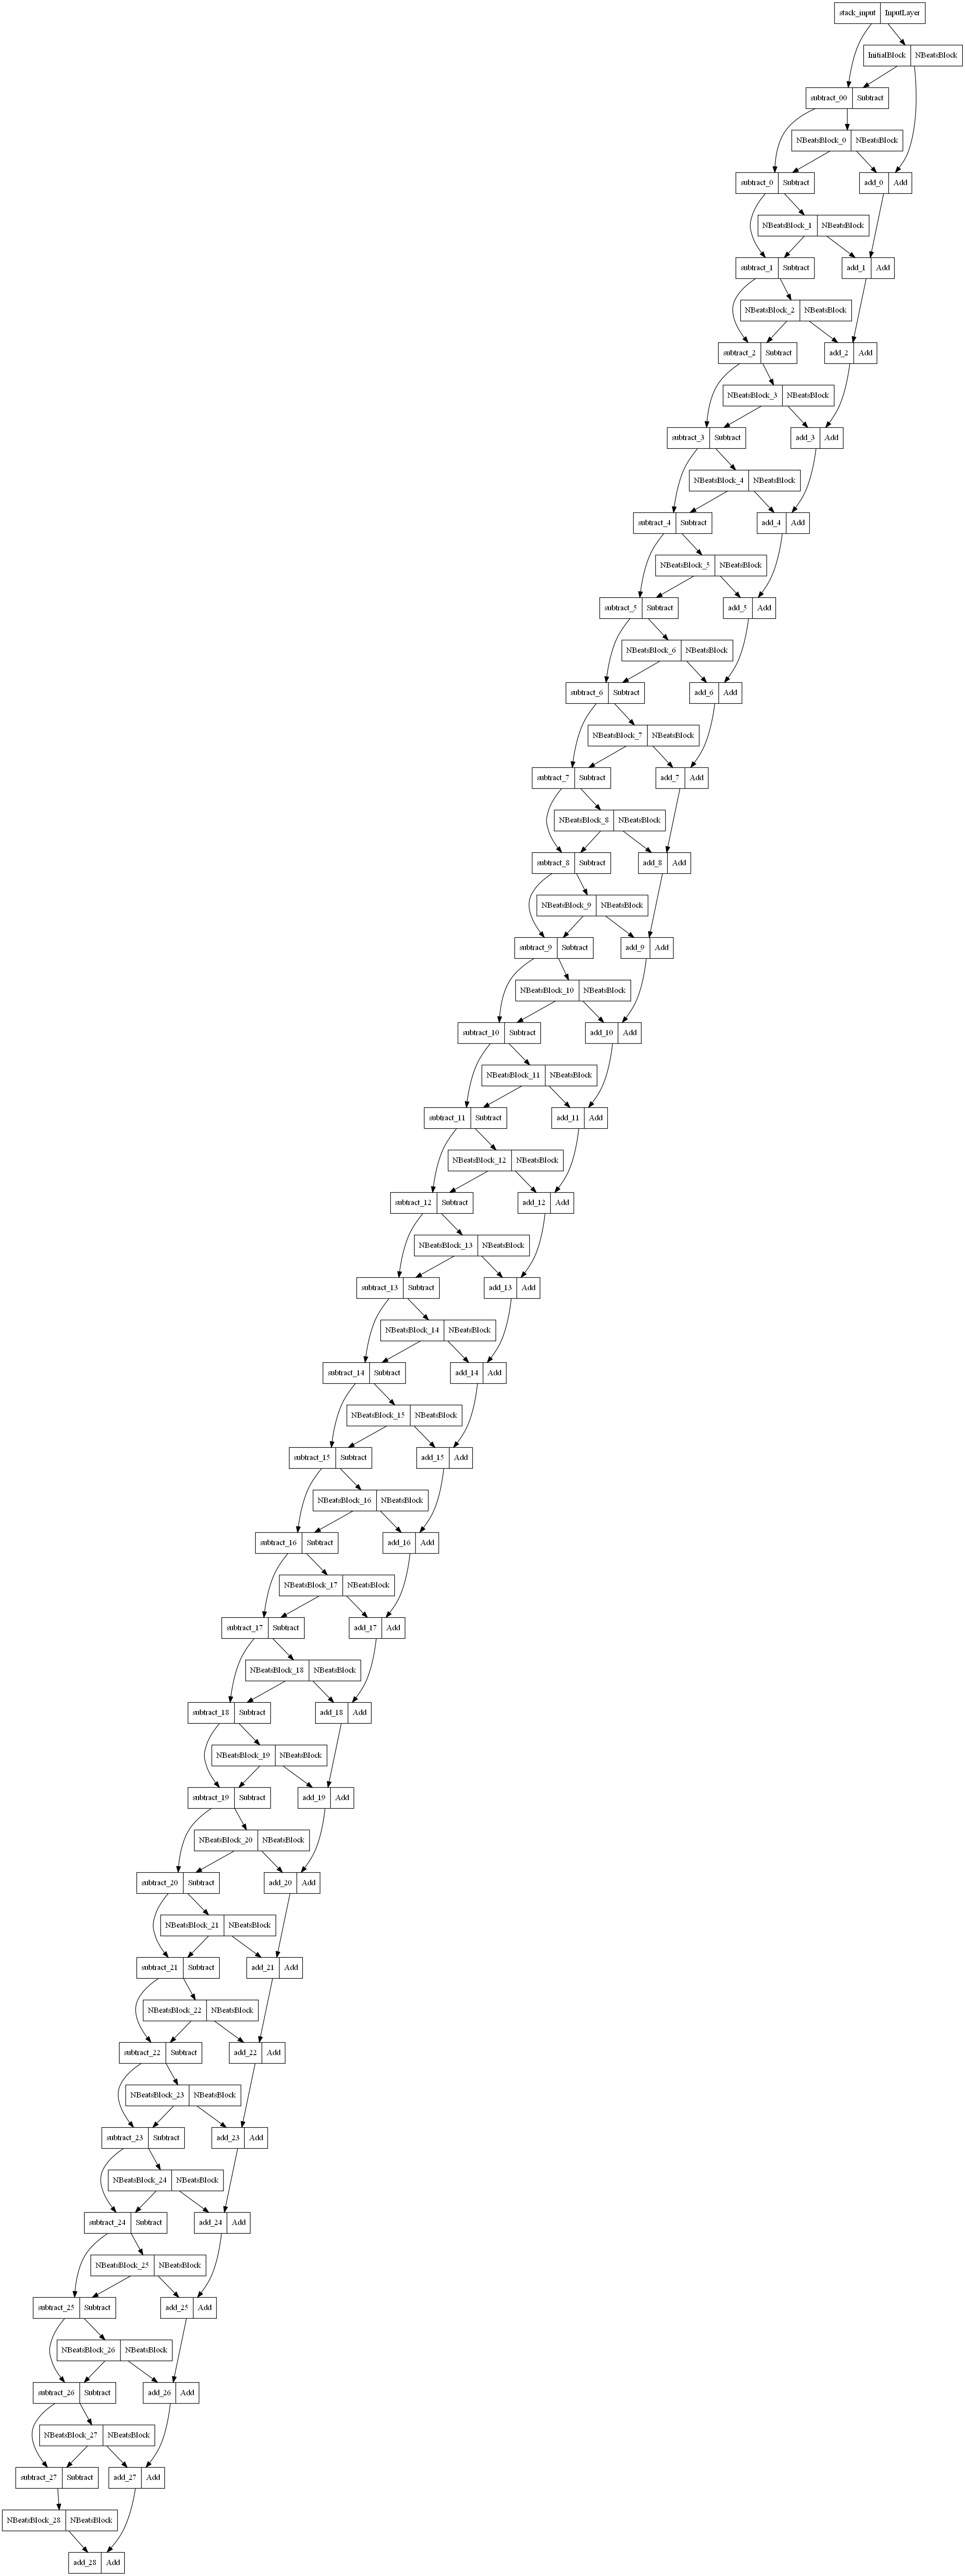

In [119]:
# Plot the N-BEATS model
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble (stacking different models together)

An ensemble leverages the wisdom of the crow effect.

It combines many *different* models to predeict a common goal

In [120]:
HORIZON, WINDOW_SIZE

(1, 7)

### Constructing and fitting an ensemble of models (using different loss functions)

In [123]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae","mse","mape"]):
    """
    Returns a list of num_iter models each trained on MAE, MSE, and MAPE loss.

    For example, if num_iter = 10, a list of 30 trained models will be returned:
    10 * len(loss_fn)
    """

    # Make empty list for trained ensemble models
    ensemble_models = []

    # Create num_iter number of models per loss function
    for i in range(num_iter):
        # Build and fit a new model with a different loss function
        for loss_function in loss_fns:
            print(f"Optimizing model by reducing: {loss_function} for {num_epochs}, model numer: {i}")

            # Construct a simple model
            model = tf.keras.Sequential([
                layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
                layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
                layers.Dense(HORIZON)
            ])
        
            # Compile simple model with current loss function
            model.compile(loss=loss_function,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae","mse"])
            
            # Fit 
            model.fit(train_data,
                      epochs=num_epochs,
                      verbose=0,
                      validation_data=test_data,
                      callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                                  patience=200,
                                                                  restore_best_weights=True),
                                 tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                      patience=100,
                                                                      verbose=1)])
            # Append fitted model
            ensemble_models.append(model)
    
    return ensemble_models

In [124]:
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000, model numer: 0
Optimizing model by reducing: mse for 1000, model numer: 0

Epoch 618: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 734: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 834: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mape for 1000, model numer: 0

Epoch 168: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 268: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000, model numer: 1

Epoch 997: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000, model numer: 1

Epoch 410: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 510: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000, model numer: 1

Epo

### Make predicitions with our ensemble model

In [127]:
# Create a function which uses a list of trained models to make a return a list of predictions
def make_ensemble_preds(ensemble_models, data):
    ensemble_preds = []
    for model in ensemble_models:
        preds = model.predict(data)
        ensemble_preds.append(preds)
    return tf.constant(tf.squeeze(ensemble_preds))

In [129]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)                                     

1/1 [==============================] - 0s 12ms/step


In [130]:
# Let's take a look at the predictions
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8786.631,  8786.751,  9070.188, ..., 50637.695, 49912.035,
        46804.06 ],
       [ 8767.172,  8743.566,  9053.525, ..., 49376.188, 48506.203,
        45337.086],
       [ 8745.424,  8733.031,  9101.386, ..., 49267.17 , 47660.434,
        45370.047],
       ...,
       [ 8823.241,  8733.043,  9081.937, ..., 49557.383, 49771.344,
        46508.43 ],
       [ 8722.952,  8804.052,  9095.481, ..., 49550.598, 48483.406,
        45068.6  ],
       [ 8822.861,  8768.188,  9048.345, ..., 49775.97 , 48100.133,
        45893.246]], dtype=float32)>

In [131]:
# Evaluate results
model_8_results = evaluate_preds(y_true=y_test,
                                 y_pred=ensemble_preds)
model_8_results                                 

{'mae': 578.437744140625,
 'mse': 1181604.5,
 'rmse': 1086.8521728515625,
 'mape': 2.646515369415283,
 'mase': 1.0161548852920532}

Save model results

In [132]:
from Functions.helper_functions import save_model_results_json

des_path = r"Saved Results\10_time_series_forecasting_with_tensorflow"

save_model_results_json(filepath=des_path,
                        var_to_save=model_8_results,
                        file_string="model_8_results")

Success! File written to destination.


Our ensemble preds come out in multiple dimensions but to combine them into **point predictions** we can leverage the mean of all the predictions using the `mean` or `median`.

In [133]:
# Taking the mean between our 15 different models
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8781.796, 8774.715, 9068.423, 8730.153, 8743.484, 8713.351,
       8662.634, 8477.231, 8452.706, 8525.568], dtype=float32)>

In [134]:
# Taking the median
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8786.349 , 8776.908 , 9070.188 , 8725.19  , 8747.729 , 8714.064 ,
       8650.561 , 8478.888 , 8452.234 , 8518.1455], dtype=float32)

In [135]:
# Evaluate results
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results       

{'mae': 567.1141967773438,
 'mse': 1147805.25,
 'rmse': 1071.356689453125,
 'mape': 2.580984115600586,
 'mase': 0.9962625503540039}

Save model results - ensemble

In [137]:
from Functions.helper_functions import save_model_results_json

des_path = r"Saved Results\10_time_series_forecasting_with_tensorflow"

save_model_results_json(filepath=des_path,
                        var_to_save=ensemble_results,
                        file_string="model_8_results_ensemble")

Success! File written to destination.


### Plotting the prediction intervals (uncertainity estimates) of our ensemble

So far, we've been making point predictions with our models. 

E.g. `HORIZON = 1` our model predicts tomorrow's price of Bitcoin wil be 50,000 USD

Wouldn't it be helpful if we knew a range of where that prediction came from?

Instead of 50,000 USD on the dot, how about 48,000 to 52,000 USD?

One way to get the 95% confidence prediction intervals for a deep learning model is the boostrap method:
1. Take the prediction from a number of randomly initialized models (we've got this thanks to our ensemble models)
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal), 95% of observations fall within 1.96 standard deviations of the mean.
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in 3. to the mean/median of the predictions made in 1.

In [138]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds):

    # 2. Measure standard deviation
    std = tf.math.reduce_std(preds, axis=0)
    
    # 3. Mulitply 
    interval = 1.96*std

    # 4. Get the prediction interval upper and lower bounds
    preds_mean = tf.reduce_mean(preds, axis=0)
    lower, upper = preds_mean - interval, preds_mean + interval

    return lower, upper

In [140]:
# Get the lower and upper bounds of the 95% percent prediction interval
lower, upper = get_upper_lower(preds=ensemble_preds)
lower[:10], upper[:10]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8725.07  , 8723.742 , 9009.7705, 8656.384 , 8669.419 , 8657.815 ,
        8602.979 , 8407.965 , 8405.193 , 8492.421 ], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8838.521 , 8825.6875, 9127.075 , 8803.923 , 8817.55  , 8768.886 ,
        8722.289 , 8546.498 , 8500.219 , 8558.716 ], dtype=float32)>)

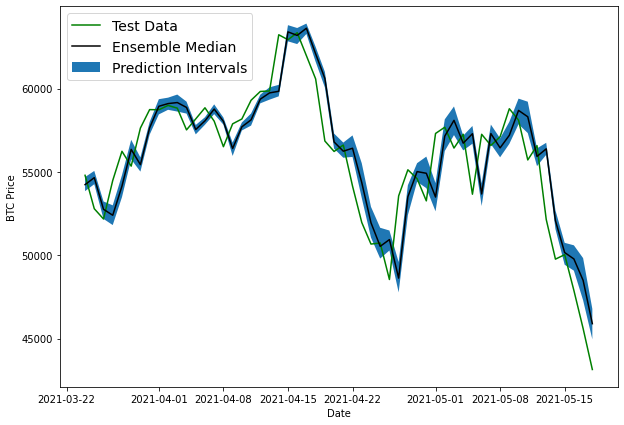

In [142]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble with prediction intervals
offset=500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# To plot the upper and lower bounds let;s use fill_between
plt.fill_between(X_test.index[offset:], (lower)[offset:], (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

So far, all of our models have been lagging behind the test data ...

They're replicating what the naive model does and just predicts the precious timestep as the next time step.

As is they're replicating what the naive model does and just predicts the previous timestep as the next timestep.

> 🔑 **Note**: These prediction intervals are estimates themselves. They have been created with the assumption that our model's data is from a normal distribution.